<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [22]:
#Import and setup matplotlib:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
mpl.style.use('ggplot') # optional: for ggplot-like style
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

#install seaborn 
%pip install seaborn  

#import seaborn
import seaborn as sns

#import wordcloud
import wordcloud

# check for latest version of Matplotlib and seaborn
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Seaborn version: ', sns.__version__)
print('WordCloud version: ', wordcloud.__version__)

Matplotlib version:  3.5.2
Seaborn version:  0.13.2
WordCloud version:  1.9.2


In [21]:
sns.__version__

'0.13.2'

In [6]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [23]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [24]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [25]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [31]:
df = pd.read_csv(file_name)

<ipython-input-31-2c44c8fa2734>:1: DtypeWarning: Columns (0,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [7]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Figure size 1000x600 with 0 Axes>

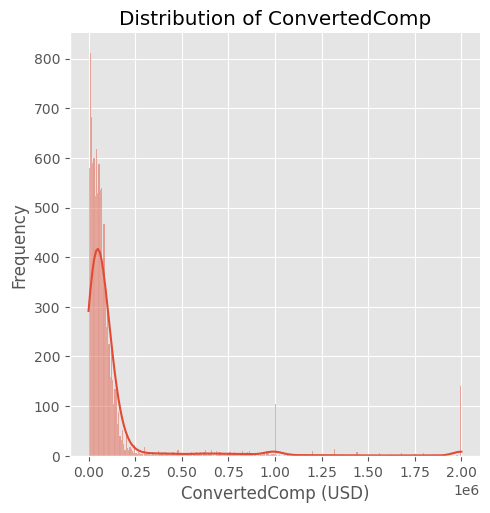

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download and load the dataset (This part is for JupyterLite, skip this if running locally)
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
await download(file_path, "m1_survey_data.csv")
file_name = "m1_survey_data.csv"

# Load the dataset
df = pd.read_csv(file_name)

# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.displot(df['ConvertedComp'].dropna(), kde=True)
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.show()


Plot the histogram for the column `ConvertedComp`.


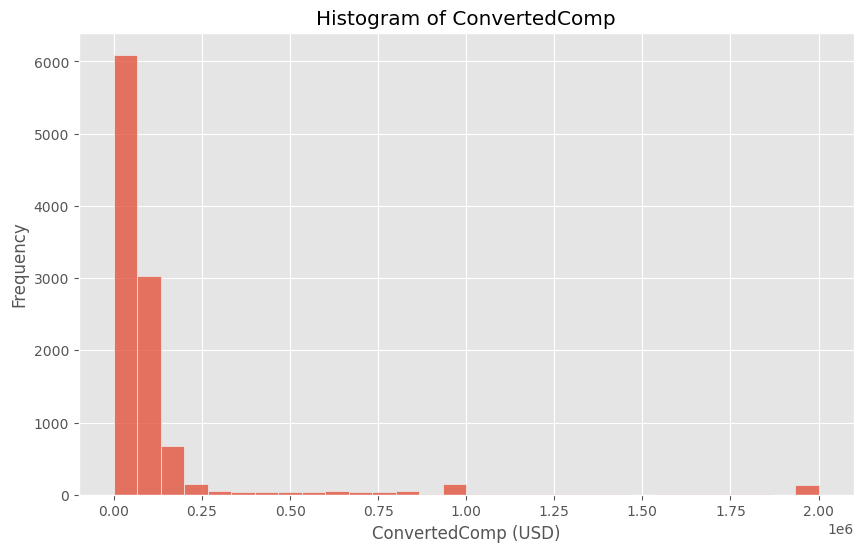

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download and load the dataset (This part is for JupyterLite, skip this if running locally)
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
await download(file_path, "m1_survey_data.csv")
file_name = "m1_survey_data.csv"

# Load the dataset
df = pd.read_csv(file_name)

# Plot the histogram for the 'ConvertedComp' column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), bins=30, kde=False)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [35]:
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

print(f'The median of the "ConvertedComp" column is: {median_converted_comp}')


The median of the "ConvertedComp" column is: 57744.0


How many responders identified themselves only as a **Man**?


In [16]:
# Filter the dataframe for respondents who identified themselves only as a man
man_respondents = df[df['Gender'] == 'Man']

# Count the number of such respondents
num_man_respondents = man_respondents.shape[0]

print(f'The number of respondents who identified themselves only as a man is: {num_man_respondents}')


The number of respondents who identified themselves only as a man is: 10618


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# your code goes here
# Filter the dataframe for respondents who identified themselves only as a Woman
Woman_respondents = df[df['Gender'] == 'Woman']

# Count the number of such respondents
num_Woman_respondents = Woman_respondents.shape[0]

print(f'The number of respondents who identified themselves only as a Woman is: {num_Woman_respondents}')


The number of respondents who identified themselves only as a Woman is: 740


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
# your code goes here
# Get the five number summary for the 'Age' column
age_summary = df['Age'].describe()

min_age = age_summary['min']
q1_age = df['Age'].quantile(0.25)
median_age = age_summary['50%']
q3_age = df['Age'].quantile(0.75)
max_age = age_summary['max']

print("Five number summary for the 'Age' column:")
print(f"Minimum: {min_age}")
print(f"First Quartile (Q1): {q1_age}")
print(f"Median: {median_age}")
print(f"Third Quartile (Q3): {q3_age}")
print(f"Maximum: {max_age}")


Five number summary for the 'Age' column:
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


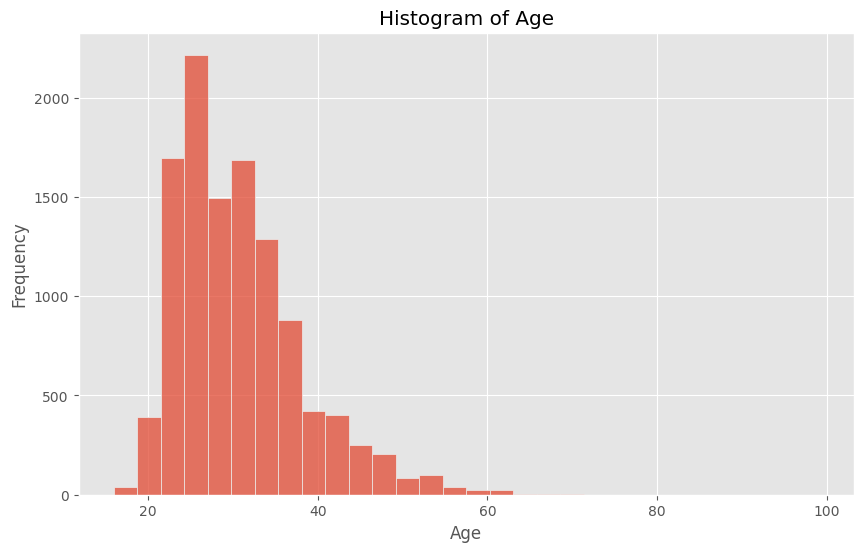

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download and load the dataset (This part is for JupyterLite, skip this if running locally)
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
await download(file_path, "m1_survey_data.csv")
file_name = "m1_survey_data.csv"

# Load the dataset
df = pd.read_csv(file_name)

# Plot the histogram for the 'Age' column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

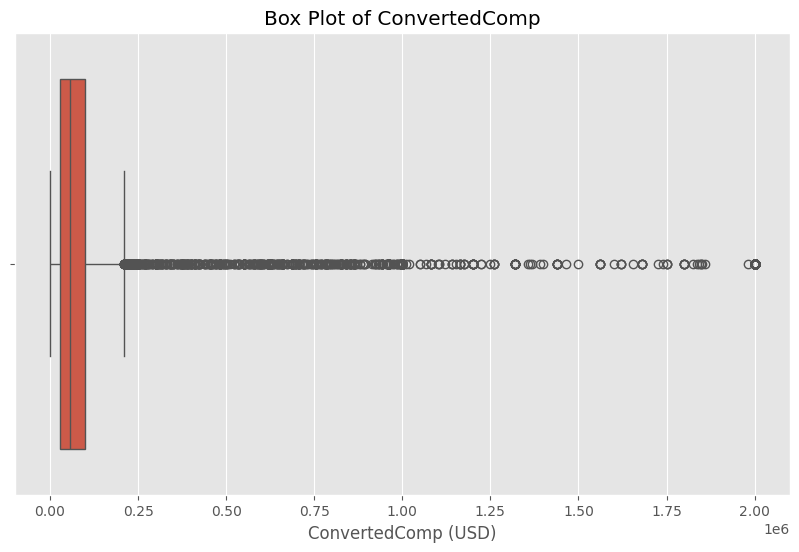

In [46]:

import matplotlib.pyplot as plt

# Download and load the dataset (This part is for JupyterLite, skip this if running locally)
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
await download(file_path, "m1_survey_data.csv")
file_name = "m1_survey_data.csv"

# Load the dataset
df = pd.read_csv(file_name)

# Plot the box plot for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'].dropna())
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [56]:
import pandas as pd

# Download and load the dataset (This part is for JupyterLite, skip this if running locally)
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
await download(file_path, "m1_survey_data.csv")
file_name = "m1_survey_data.csv"

# Load the dataset
df = pd.read_csv(file_name)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

print(f"First Quartile (Q1): {q1}")
print(f"Third Quartile (Q3): {q3}")
print(f"Interquartile Range (IQR): {iqr}")


First Quartile (Q1): 26727.0
Third Quartile (Q3): 100000.0
Interquartile Range (IQR): 73273.0


Find out the upper and lower bounds.


In [63]:
import pandas as pd

# Download and load the dataset (This part is for JupyterLite, skip this if running locally)
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
await download(file_path, "m1_survey_data.csv")
file_name = "m1_survey_data.csv"

# Load the dataset
df = pd.read_csv(file_name)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -83182.5
Upper Bound: 209909.5


Identify how many outliers are there in the `ConvertedComp` column.


In [66]:
import pandas as pd

# Download and load the dataset (This part is for JupyterLite, skip this if running locally)
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
await download(file_path, "m1_survey_data.csv")
file_name = "m1_survey_data.csv"

# Load the dataset
df = pd.read_csv(file_name)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]
print(f"Number of outliers in the 'ConvertedComp' column: {num_outliers}")


Number of outliers in the 'ConvertedComp' column: 888


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [67]:
import pandas as pd

# Download and load the dataset (This part is for JupyterLite, skip this if running locally)
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
await download(file_path, "m1_survey_data.csv")
file_name = "m1_survey_data.csv"

# Load the dataset
df = pd.read_csv(file_name)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(f"Original dataframe shape: {df.shape}")
print(f"New dataframe shape after removing outliers: {df_no_outliers.shape}")


Original dataframe shape: (11552, 85)
New dataframe shape after removing outliers: (9842, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [24]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Age' with all other numerical columns
age_correlation = correlation_matrix['Age']

print("Correlation of 'Age' with all other numerical columns:")
print(age_correlation)


<ipython-input-24-a7b5bca823c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation of 'Age' with all other numerical columns:
CodeRevHrs   -0.019647
Age           1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
